In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
file='final_results_2'
file2='figs'
num_file=0

In [3]:
def data(df_sp, df_a, ref, kk):
    "Calculates number of survivors, QS survivors and, NQS survivors from date frame df_sp."
    "df_sp is the data frame with the list of QS species."
    "df_a is the data frame with the experimental data."
    "red is the bibliographic reference."
    "kk is a string that labels the species of the experiment."
    
    #Identify QS strains
    qs_list=np.zeros(len(df_a))
    for ii in range(len(df_a)):
        if len(df_a['Genus'][ii])==9:
            spc_num=int(df_a['Genus'][ii][-2:])
        else:
            spc_num=int(df_a['Genus'][ii][-1])
        if df_sp['QuorumSensing'][spc_num-1] == 'Yes':
            qs_list[ii]=1

    #Idfentify number of initial strains and number of survivors
    num_st=len(df_a)
    surv=np.count_nonzero(df_a['Final'+str(kk)])/num_st

    #Calculate number of QS and NQS survivors only for experiments with QS strains
    num_QS=np.count_nonzero(qs_list)
    if num_QS>0:
        survQS=np.count_nonzero(df_a['Final'+str(kk)][qs_list==1])/num_QS
        survNQS=np.count_nonzero(df_a['Final'+str(kk)][qs_list==0])/(num_st-num_QS)
        QS_pre='Yes'
    else:
        survQS=np.nan
        survNQS=np.nan
        QS_pre='No'

    #Percentage of QS strains
    QS_p=num_QS*100/num_st
    
    ref = 'Hu et al 2022'

    return QS_p, surv, survQS, survNQS, QS_pre, ref

## QS Database

In [4]:
df = pd.read_csv('QSDB_V1_1QSQQ.csv',encoding='cp1252')

In [5]:
df=df[['Name', 'Genus', 'Species', 'Sensing', 'Producing']]

In [6]:
con_1 = df['Sensing']=='Yes'


In [7]:
genus = df['Genus'][con_1].drop_duplicates()
genus = genus.sort_values(ascending=True).reset_index(drop=True)

In [8]:
genus

0     Aggregatibacter
1            Bacillus
2        Burkholderia
3         Clostridium
4        Enterobacter
5        Enterococcus
6         Escherichia
7         Haemophilus
8         Pseudomonas
9          Salmonella
10           Serratia
11    Staphylococcus 
12      Streptococcus
13             Vibrio
14           Yersinia
Name: Genus, dtype: object

In [9]:
genus.to_excel('database_genus.xlsx')

In [10]:
#The label was done manually
df_species = pd.read_csv('genus_qs_Hu_et_al_2022.csv')

In [11]:
df_species

,Genus,QuorumSensing
0,Sphingobacterium,No
1,Bacillus,Yes
2,Herbaspirillum,No
3,Raoultella,No
4,Pluralibacter,No
5,Pseudomonas,Yes
6,Yersinia,Yes
7,Stenotrophomonas,No
8,NaN,No
9,Citrobacter,No


In [11]:
df_species.to_excel('species_exp.xlsx')

## Hu et al 2022

In [12]:
#Medium nutrient S=6 Community 8
rows_l=np.array([[3,3],[8,3],[13,3],[18,3],[23,3],[28,3],[33,3],[38,3],
                 [45,6],[53,6],[61,6],[69,6],[77,6],[85,6],[93,6],[101,6],
                 [111,12],[125,12],[139,12],[153,12],[167,12],[181,12],[195,12],[209,12],
                 [225,24],[251,24],[277,24],[303,24],[329,24],[355,24],[381,24],[407,24],
                 [435,48]])

#rows_l=np.array([[45,6],[53,6],[61,6],[69,6],[77,6],[85,6],[93,6],[101,6],
#                 [111,12],[125,12],[139,12],[153,12],[167,12],[181,12],[195,12],[209,12],
#                 [225,24],[251,24],[277,24],[303,24],[329,24],[355,24],[381,24],[407,24],
#                 [435,48]])

#rows_l=np.array([[111,12],[125,12],[139,12],[153,12],[167,12],[181,12],[195,12],[209,12],
#                 [225,24],[251,24],[277,24],[303,24],[329,24],[355,24],[381,24],[407,24],
#                 [435,48]])

exp_dat = pd.DataFrame(columns=['% QS strains', 'Survivors', 'QS Survivors',
                           'NQS Survivors', 'QS', 'Reference'])

for kk in range(len(rows_l)):

    r1 = rows_l[kk][0]
    r2 = rows_l[kk][1]

    df_aux = pd.read_excel('science.abm7841_data_s1.xlsx', sheet_name='MN species abundances', usecols="L,M,N,O",
                           header=None, names=['Genus', 'Final1', 'Final2', 'Final3'], skiprows=r1, nrows=r2)
    
    for ii in range(3):
        QS_per, survivors, QSsurv, NQSsurv, QS_p, ref = data(df_species, df_aux, 'Hu et al 2022',ii+1)
        new_dat = pd.DataFrame({'% QS strains': [QS_per], 'Survivors': [survivors], 'QS Survivors': [QSsurv],
                           'NQS Survivors': [NQSsurv], 'QS': [QS_p], 'Reference': [ref]})
        exp_dat = pd.concat([exp_dat, new_dat], ignore_index=True)

/var/folders/s3/sfwb9bxx1d1_8lw_f0b9k8s80000gn/T/ipykernel_71372/1200858456.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  exp_dat = pd.concat([exp_dat, new_dat], ignore_index=True)


In [13]:
exp_dat

,% QS strains,Survivors,QS Survivors,NQS Survivors,QS,Reference
0,33.333333,0.666667,1.000000,0.500000,Yes,Hu et al 2022
1,33.333333,1.000000,1.000000,1.000000,Yes,Hu et al 2022
2,33.333333,0.666667,1.000000,0.500000,Yes,Hu et al 2022
3,33.333333,0.666667,1.000000,0.500000,Yes,Hu et al 2022
4,33.333333,0.666667,1.000000,0.500000,Yes,Hu et al 2022
...,...,...,...,...,...,...
94,8.333333,0.416667,0.500000,0.409091,Yes,Hu et al 2022
95,8.333333,0.375000,0.500000,0.363636,Yes,Hu et al 2022
96,18.750000,0.208333,0.111111,0.230769,Yes,Hu et al 2022
97,18.750000,0.562500,0.666667,0.538462,Yes,Hu et al 2022


## Correlations in experiments and model

In [20]:
file2='exp_val_4_new'
#file2='exp_val_0mean'
QS_prcntg_theo=np.load(file+'/exp data/qs_'+file2+'.npy')
survivors_theo=np.load(file+'/exp data/survivors_'+file2+'.npy')
survivorsQS_theo=np.load(file+'/exp data/survivorsQS_'+file2+'.npy')
survivorsNQS_theo=np.load(file+'/exp data/survivorsNQS_'+file2+'.npy')
theo_dat=pd.DataFrame({'% QS strains': QS_prcntg_theo,
                       'Survivors': survivors_theo,
                       'QS Survivors': survivorsQS_theo,
                       'NQS Survivors': survivorsNQS_theo,
                       'Data': np.full(len(QS_prcntg_theo), 'Model')})

In [21]:
theo_dat_2=pd.DataFrame(columns=['% QS strains',
                       'Survivors',
                       'QS Survivors',
                       'NQS Survivors',
                       'Data', 'Std S'])

for var in theo_dat['% QS strains'].unique():
    new_dat=pd.DataFrame({'% QS strains': [var],
                       'Survivors': [theo_dat['Survivors'][theo_dat['% QS strains']==var].mean()],
                       'QS Survivors': [theo_dat['QS Survivors'][theo_dat['% QS strains']==var].mean()],
                       'NQS Survivors': [theo_dat['NQS Survivors'][theo_dat['% QS strains']==var].mean()],
                       'Data': ['Model'], 'Std S': [theo_dat['Survivors'][theo_dat['% QS strains']==var].std()]})
    theo_dat_2 = pd.concat([theo_dat_2,new_dat], ignore_index=True)


/var/folders/s3/sfwb9bxx1d1_8lw_f0b9k8s80000gn/T/ipykernel_71372/456510275.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  theo_dat_2 = pd.concat([theo_dat_2,new_dat], ignore_index=True)


In [22]:
theo_dat_2

,% QS strains,Survivors,QS Survivors,NQS Survivors,Data,Std S
0,10.0,0.44554,0.439000,0.446267,Model,0.131178
1,20.0,0.44854,0.454100,0.447150,Model,0.130066
2,30.0,0.45522,0.459067,0.453571,Model,0.133118
3,40.0,0.46018,0.463650,0.457867,Model,0.133221
4,50.0,0.46922,0.473320,0.465120,Model,0.134172
5,60.0,0.47956,0.478300,0.481450,Model,0.136330
6,70.0,0.48938,0.491686,0.484000,Model,0.137014
7,80.0,0.49812,0.500450,0.488800,Model,0.135632
8,90.0,0.50884,0.509244,0.505200,Model,0.135711


In [23]:
fig_dat = pd.DataFrame({'% QS strains': exp_dat['% QS strains'][exp_dat['QS']=='Yes'],
                        'Survivors': exp_dat['Survivors'][exp_dat['QS']=='Yes'],
                        'QS Survivors': exp_dat['QS Survivors'][exp_dat['QS']=='Yes'],
                        'NQS Survivors': exp_dat['NQS Survivors'][exp_dat['QS']=='Yes'],
                        'Data': np.full(len(exp_dat['Survivors'][exp_dat['QS']=='Yes']), 'Experiment')})

In [24]:
fig_dat = pd.DataFrame({'% QS strains': exp_dat['% QS strains'][exp_dat['QS']=='Yes'],
                        'Survivors': exp_dat['Survivors'][exp_dat['QS']=='Yes'],
                        'QS Survivors': exp_dat['QS Survivors'][exp_dat['QS']=='Yes'],
                        'NQS Survivors': exp_dat['NQS Survivors'][exp_dat['QS']=='Yes'],
                        'Data': np.full(len(exp_dat['Survivors'][exp_dat['QS']=='Yes']), 'Experiment')})

In [15]:
def survivors(fractions, num_strains, target_reseeds, trlnumber):
    #Calculates the number of survivors at the final dilution from fractions data
    #num_strains is an integer

    survivors_ = np.zeros(trlnumber)
    
    for ii in range(trlnumber):
        survivors_[ii]=np.count_nonzero(fractions[ii,target_reseeds,:])/num_strains

    return survivors_

In [17]:
target_reseeds = 200
trlnumber=5000

name=np.array(['p10', 'p15', 'p20', 'p25', 'p35', 'p40', 'p50', 'p502', 'p60', 'p65', 'p75', 'p80', 'p85', 'p90', 'p100'])
names=np.full(len(name), '',dtype=object)
num_strains = 15

surv_a = np.zeros(len(name))
yy_err = np.zeros(len(name))

for kk in range(len(name)):
    if kk!=2:
        names[kk]='beta_1e9_15s_st_1e9_QS'+name[kk]
    else:
        names[kk]='beta_1e9_15s_st_1e9'

    file_2=names[kk]
    fractions=np.load(file+'/fractions_'+names[kk]+'.npy')

    surv_a[kk]=np.average(survivors(fractions, num_strains, target_reseeds, trlnumber))
    yy_err[kk]=np.std(survivors(fractions, num_strains, target_reseeds, trlnumber))

x_var = np.arange(1,15+1)*100/15

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/var/folders/s3/sfwb9bxx1d1_8lw_f0b9k8s80000gn/T/ipykernel_71372/3125255679.py:6: SyntaxWarning: invalid escape sequence '\c'
  markers= {"Experiment": "o", "Model": "$\circ$"}
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


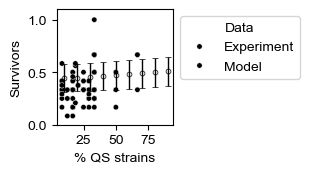

In [30]:
fig, axs = plt.subplots(1, figsize=(1.5, 1.5), layout='constrained', sharex=True)

plt.rcParams['font.family'] = 'Arial'

pal = {"Experiment": "black", "Model": "black"}
markers= {"Experiment": "o", "Model": "$\circ$"}
#ax=sns.scatterplot(data=fig_dat, x="% QS strains", y="Survivors", color='black', s=15)
ax=sns.scatterplot(data=fig_dat, x="% QS strains", y="Survivors", color='black', hue="Data", hue_order=['Experiment', 'Model'],
                   style='Data', palette=pal, markers=markers, s=15)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.errorbar(x_var, surv_a, yerr=yy_err, marker="o", c='k', linestyle='none', capsize=2.5, markersize=3.5, linewidth=1, markeredgewidth=0.5, mfc='none')
ax.errorbar(x=theo_dat_2['% QS strains'], y=theo_dat_2['Survivors'], yerr=theo_dat_2['Std S'], marker="o", c='k', linestyle='none',
            capsize=2.5, markersize=3.5, linewidth=1,markeredgewidth=0.5, mfc='none')

ax.set(ylim=(0, 1.1))
ax.set_xticks([25, 50, 75])
ax.set_xticklabels(['25', '50', '75'])

plt.savefig('fig5a.pdf', format="pdf",bbox_inches='tight', dpi=900)
#plt.savefig('figS4a.pdf', format="pdf",bbox_inches='tight', dpi=900)

plt.show()

In [42]:
fig_dat = pd.DataFrame({'% QS strains': exp_dat['% QS strains'][exp_dat['QS']=='Yes'],
                        'Survivors': exp_dat['Survivors'][exp_dat['QS']=='Yes'],
                        'QS Survivors': exp_dat['QS Survivors'][exp_dat['QS']=='Yes'],
                        'NQS Survivors': exp_dat['NQS Survivors'][exp_dat['QS']=='Yes'],
                        'Data': np.full(len(exp_dat['Survivors'][exp_dat['QS']=='Yes']), 'Experiment')})
fig_dat = pd.concat([theo_dat, fig_dat], ignore_index=True)

In [43]:
correlations = np.zeros((3,2))
p_values = np.zeros((3,2))
confidence_intervals = np.zeros((3,2,2))
confidence_intervals_low = np.zeros((3,2))
confidence_intervals_up = np.zeros((3,2))

j_ind=0
for jj in np.array(['Experiment', 'Model']):
    k_ind=0
    for kk in np.array(['Survivors', 'QS Survivors', 'NQS Survivors']):
        x=stats.pearsonr(fig_dat['% QS strains'][fig_dat['Data']==jj], fig_dat[kk][fig_dat['Data']==jj])
        correlations[k_ind][j_ind]=x[0]
        p_values[k_ind][j_ind]=x[1]
        confidence_intervals[k_ind][j_ind]=x.confidence_interval(confidence_level=0.95)
        confidence_intervals_low[k_ind][j_ind]=x[0]-x.confidence_interval(confidence_level=0.95)[0]
        confidence_intervals_up[k_ind][j_ind]=x.confidence_interval(confidence_level=0.95)[1]-x[0]
        k_ind=k_ind+1
    j_ind=j_ind+1

In [44]:
fig2_dat = pd.DataFrame({'Correlations': correlations[:,0], 'p values': p_values[:,0],
                         'CI Low': confidence_intervals_low[:,0], 'CI Up': confidence_intervals_up[:,0],
                          'Variable': np.array(['S', '$S_{QS}$', '$S_{NQS}$']), 'Data': np.full(3, 'Experiment')})
fig2_2_dat = pd.DataFrame({'Correlations': correlations[:,1], 'p values': p_values[:,1],
                         'CI Low': confidence_intervals_low[:,1], 'CI Up': confidence_intervals_up[:,1],
                          'Variable': np.array(['S', '$S_{QS}$', '$S_{NQS}$']), 'Data': np.full(3, 'Model')})
fig2_dat = pd.concat([fig2_2_dat, fig2_dat])
fig2_dat = fig2_dat.sort_values(['Data'])
fig2_dat

,Correlations,p values,CI Low,CI Up,Variable,Data
0,0.272810,0.013737,0.214900,0.190737,S,Experiment
1,0.121610,0.279474,0.220988,0.209556,$S_{QS}$,Experiment
2,0.314412,0.004255,0.211268,0.184124,$S_{NQS}$,Experiment
0,0.051794,0.000248,0.027685,0.027605,S,Model
1,0.008486,0.548552,0.027724,0.027711,$S_{QS}$,Model
2,0.020464,0.147940,0.027723,0.027692,$S_{NQS}$,Model


/var/folders/s3/sfwb9bxx1d1_8lw_f0b9k8s80000gn/T/ipykernel_29894/2030100507.py:17: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig('figS4b.pdf', format="pdf",bbox_inches='tight', dpi=900)
/var/folders/s3/sfwb9bxx1d1_8lw_f0b9k8s80000gn/T/ipykernel_29894/2030100507.py:17: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig('figS4b.pdf', format="pdf",bbox_inches='tight', dpi=900)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


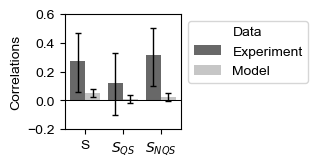

In [45]:
fig, axs = plt.subplots(1, figsize=(1.5, 1.5), layout='constrained', sharex=True)

plt.rcParams['font.family'] = 'Arial'
#plt.grid()
axs.axhline(0, color='black', linestyle='-', linewidth=0.75)

pal = {"Experiment": "black", "Model": "ligthgray"}
ax=sns.barplot(fig2_dat, x="Variable", y="Correlations", hue='Data', palette="Greys_r")
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-2], y=y_coords[:-2], yerr=fig2_dat[["CI Low","CI Up"]].T, fmt="none", c="k", capsize=2.5, markersize=4, linewidth=1)
ax.set(ylim=(-0.2, 0.6))
ax.set(xlabel=None) 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.savefig('fig5b.pdf', format="pdf",bbox_inches='tight', dpi=900)
plt.savefig('figS4b.pdf', format="pdf",bbox_inches='tight', dpi=900)

plt.show()